In [6]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import time
import seaborn as sns

from tqdm import tqdm

from sklearn.model_selection import train_test_split, cross_validate
from sklearn.svm import LinearSVC
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_validate

In [2]:
data = pd.read_csv('train.csv')
data.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,242642,2881,130,22,210,54,1020,250,221,88,...,0,0,0,0,0,0,0,0,0,1
1,309891,3005,351,14,242,-16,1371,194,215,159,...,0,0,0,0,0,0,0,0,0,1
2,287847,3226,63,14,618,2,1092,232,210,107,...,0,0,0,0,0,0,0,0,0,1
3,516307,3298,317,8,661,60,752,198,233,174,...,0,0,0,0,0,0,0,0,0,1
4,124860,3080,35,6,175,26,3705,219,227,144,...,0,0,0,0,0,0,0,0,0,1


## Data exploration

### Global description

In [9]:
data.iloc[:,1:11].describe().T

,count,mean,std,min,25%,50%,75%,max
Elevation,15120.0,2748.649934,419.009589,1877.0,2373.0,2754.0,3109.0,3850.0
Aspect,15120.0,155.834524,109.745372,0.0,65.0,125.0,257.0,360.0
Slope,15120.0,16.556746,8.534602,0.0,10.0,15.0,22.0,50.0
Horizontal_Distance_To_Hydrology,15120.0,228.376521,209.196381,0.0,67.0,180.0,330.0,1376.0
Vertical_Distance_To_Hydrology,15120.0,51.311706,61.520488,-135.0,5.0,32.0,80.0,570.0
Horizontal_Distance_To_Roadways,15120.0,1717.977712,1330.263450,0.0,760.0,1315.0,2292.0,6803.0
Hillshade_9am,15120.0,213.028836,30.638406,52.0,197.0,220.0,236.0,254.0
Hillshade_Noon,15120.0,218.865741,22.797288,99.0,207.0,223.0,235.0,254.0
Hillshade_3pm,15120.0,134.477116,46.070054,0.0,106.0,138.0,166.0,251.0
Horizontal_Distance_To_Fire_Points,15120.0,1527.357804,1116.636997,0.0,750.0,1266.0,2002.0,7095.0


In [4]:
print('All variables are numerical : ' + str(np.sum([np.dtype(data.iloc[:,k])=='int64' for k in range(len(data.columns))])==len(data.columns)))

All variables are numerical : True


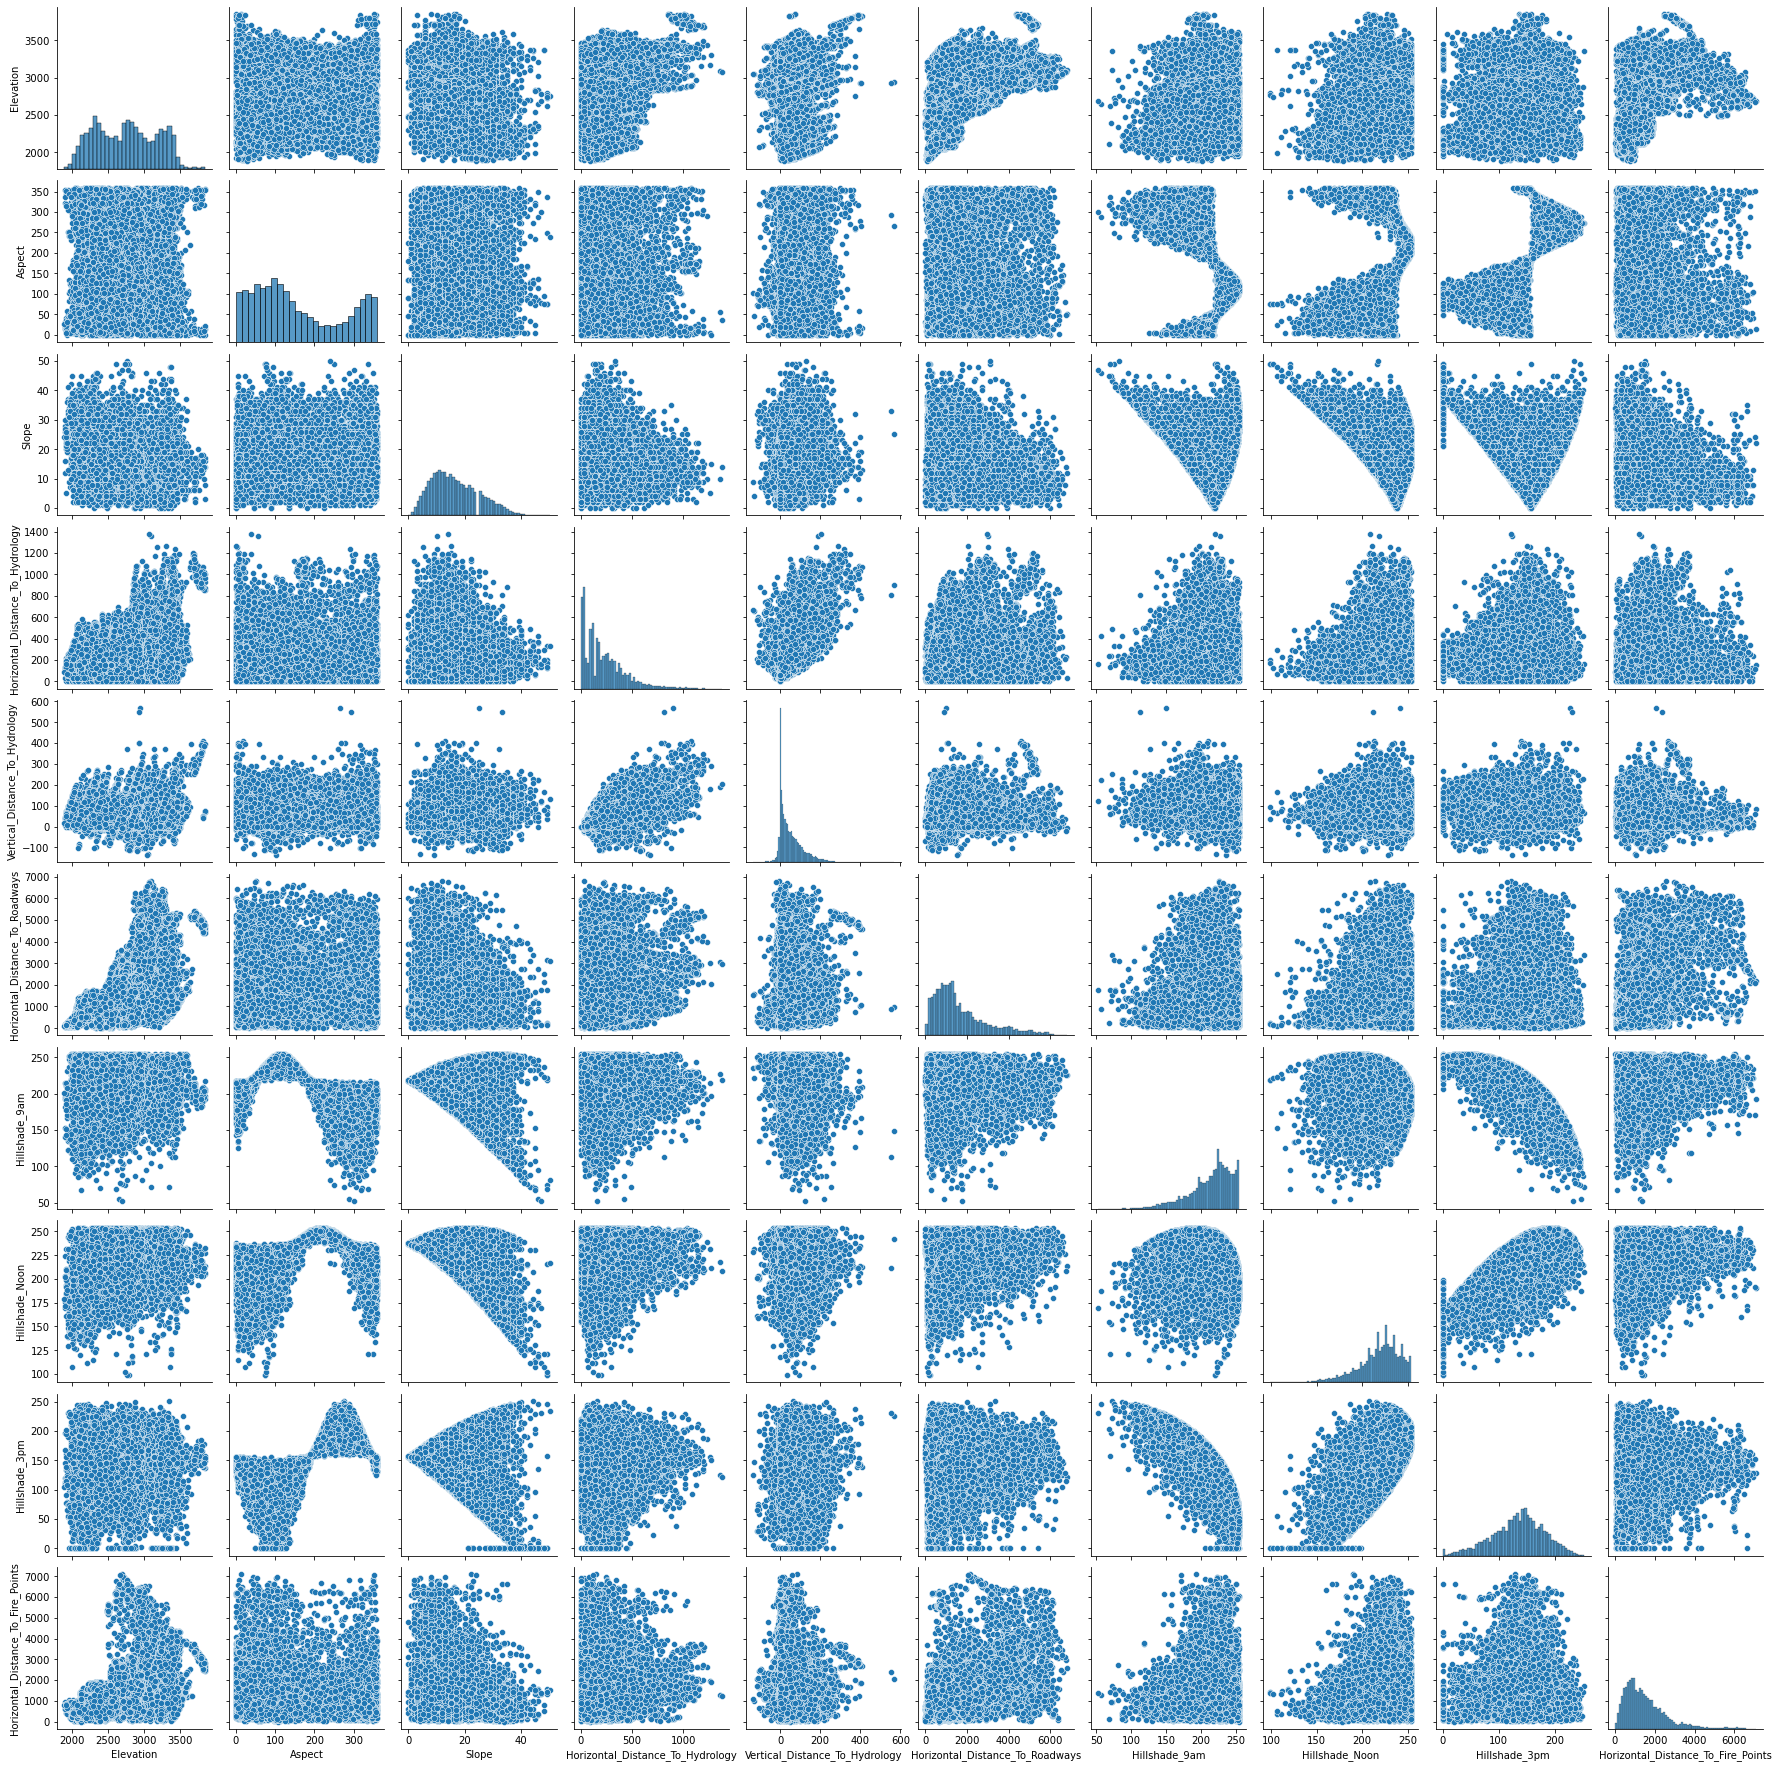

In [8]:
sns.pairplot(data.iloc[:,1:11])

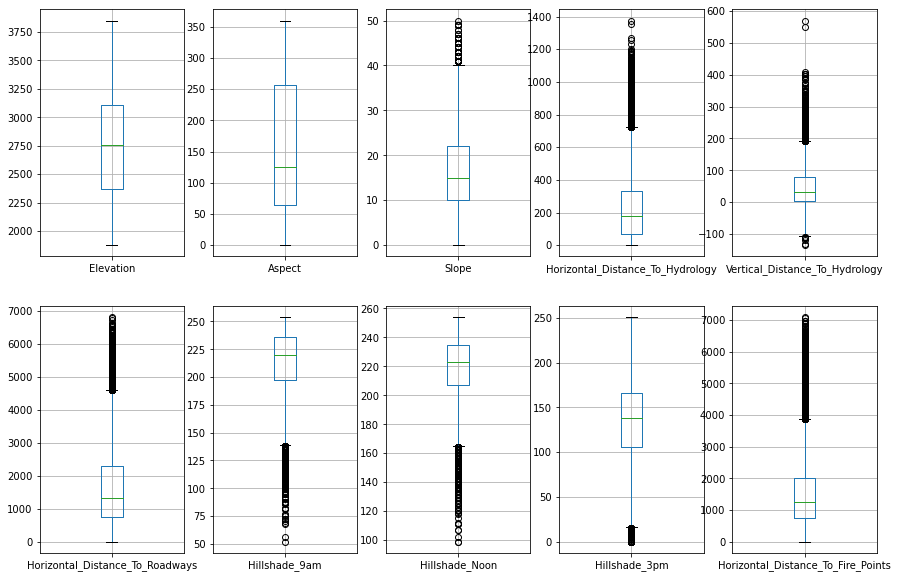

In [120]:
fig, axes = plt.subplots(2, 5, figsize=(15,10))
for k in range(1,11):
    data.iloc[:,[k]].boxplot(ax = axes.flatten()[k-1])

### Soil Type
Let's see the soil type repartition.

In [17]:
soil_type = []
for k in range(len(data)) :
    soil_type += [np.sum(data.iloc[k,15:55].multiply(np.array(range(1,41))))]
soil_type_df = pd.DataFrame({'Id' : data.Id , 'Soil_type' : soil_type})
soil_type_df.head()

,Id,Soil_type
0,242642,30
1,309891,24
2,287847,29
3,516307,23
4,124860,24


Text(0, 0.5, 'Frequency')

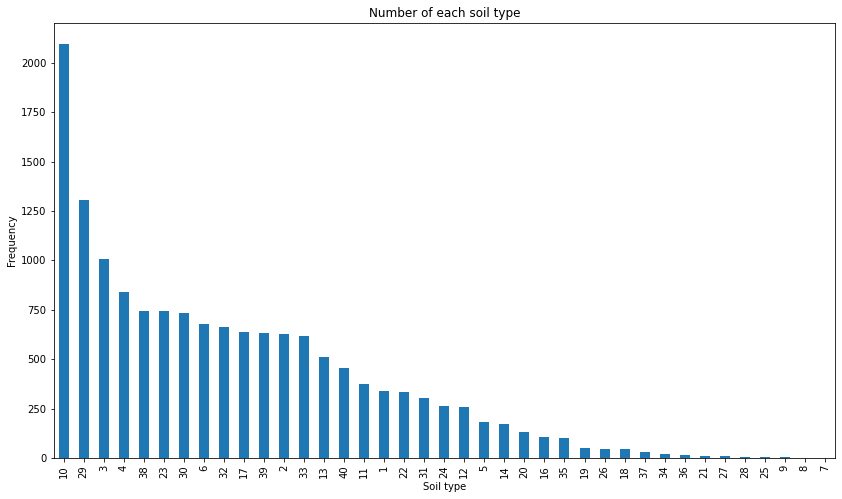

In [55]:
ax = soil_type_df['Soil_type'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Number of each soil type")
ax.set_xlabel("Soil type")
ax.set_ylabel("Frequency")

In [23]:
st7 = soil_type_df.loc[soil_type_df['Soil_type']==7].shape[0]
st10 = soil_type_df.loc[soil_type_df['Soil_type']==10].shape[0]
print('Soil_type 7 represented ' + str(st7) + ' times.')
print('Soil_type 10 represented ' + str(st10) + ' times.')

Soil_type 7 represented 1 times.
Soil_type 10 represented 2096 times.


### Wilderness area
Let's see the wilderness area repartition.

In [25]:
wilderness_area = []
for k in range(len(data)) :
    wilderness_area += [np.sum(data.iloc[k,11:15].multiply(np.array(range(1,5))))]
wilderness_area_df = pd.DataFrame({'Id' : data.Id , 'Wilderness_area' : wilderness_area})
wilderness_area_df.head()

,Id,Wilderness_area
0,242642,1
1,309891,3
2,287847,1
3,516307,2
4,124860,1


Text(0, 0.5, 'Frequency')

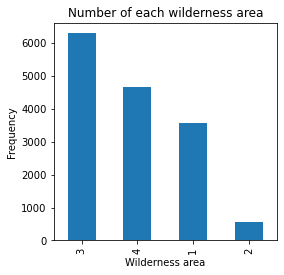

In [64]:
ax = wilderness_area_df['Wilderness_area'].value_counts().plot(kind='bar',
                                    figsize=(4,4),
                                    title="Number of each wilderness area")
ax.set_xlabel("Wilderness area")
ax.set_ylabel("Frequency")

In [27]:
wa2 = wilderness_area_df.loc[wilderness_area_df['Wilderness_area']==2].shape[0]
wa3 = wilderness_area_df.loc[wilderness_area_df['Wilderness_area']==3].shape[0]
print('Soil_type 2 represented ' + str(wa2) + ' times.')
print('Soil_type 3 represented ' + str(wa3) + ' times.')

Soil_type 2 represented 569 times.
Soil_type 3 represented 6302 times.


### Cover type
Let's see the cover type area repartition.

In [28]:
cover_type = []
for k in range(len(data)) :
    cover_type += [data.iloc[k,len(data.columns)-1]]
cover_type_df = pd.DataFrame({'Id' : data.Id , 'cover_type' : cover_type})
cover_type_df.head()

,Id,cover_type
0,242642,1
1,309891,1
2,287847,1
3,516307,1
4,124860,1


Text(0, 0.5, 'Frequency')

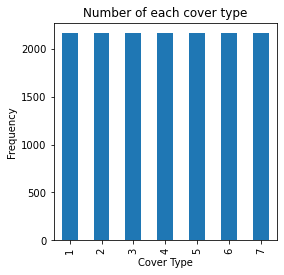

In [135]:
ax = cover_type_df['cover_type'].value_counts().plot(kind='bar',
                                    figsize=(4,4),
                                    title="Number of each cover type")
ax.set_xlabel("Cover Type")
ax.set_ylabel("Frequency")

In [29]:
ct = cover_type_df.loc[cover_type_df['cover_type']==3].shape[0]
print('Cover_type is evenly represented ' + str(ct) + ' times.')

Cover_type is evenly represented 2160 times.
